# Mounting and Importing 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from os import listdir
from os.path import isfile, join
import yaml
from glob import glob
import shutil, os

## [Github Repo](https://https://www.kaggle.com/ultralytics/yolov5)


In [ ]:
# Clonning
!git clone https://github.com/ultralytics/yolov5  

Cloning into 'yolov5'...
remote: Enumerating objects: 6213, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 6213 (delta 0), reused 0 (delta 0), pack-reused 6209
Receiving objects: 100% (6213/6213), 8.46 MiB | 35.08 MiB/s, done.
Resolving deltas: 100% (4261/4261), done.


In [ ]:
# Change WD
os.chdir( '/content/drive/MyDrive/Quinto_Anio/TESIS_Eugenia_Berrino/Part_II_DS/vinbigdata/yolov5')

In [ ]:
# install dependencies
%pip install -qr requirements.txt
%pip install -r requirements.txt wandb  

     |████████████████████████████████| 645kB 20.9MB/s 
     |████████████████████████████████| 1.8MB 18.6MB/s 
     |████████████████████████████████| 102kB 12.7MB/s 
     |████████████████████████████████| 133kB 52.3MB/s 
     |████████████████████████████████| 163kB 52.5MB/s 
     |████████████████████████████████| 71kB 10.0MB/s 
  Created wheel for subprocess32: filename=subprocess32-3.5.4-cp37-none-any.whl size=6489 sha256=3ff5445e98369e0bb15211c4b87b2dd7a4ab875d4d0b60ea52a088a9ae750ea8
  Stored in directory: /root/.cache/pip/wheels/68/39/1a/5e402bdfdf004af1786c8b853fd92f8c4a04f22aad179654d1
  Created wheel for pathtools: filename=pathtools-0.1.2-cp37-none-any.whl size=8786 sha256=5e60d771cfb3c01469051540dd756ae1f31078e290ace97bbfe962f93b4f821b
  Stored in directory: /root/.cache/pip/wheels/0b/04/79/c3b0c3a0266a3cb4376da31e5bfe8bba0c489246968a68e843
Successfully built subprocess32 pathtools


In [ ]:
import torch
from IPython.display import Image, clear_output  # to display images

clear_output()
print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

Setup complete. Using torch 1.8.1+cu101 _CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15109MB, multi_processor_count=40)


In [ ]:
!WANDB_MODE="dryrun" python train.py --img 640 --batch 16 --epochs 300 --data /content/drive/MyDrive/Quinto_Anio/TESIS_Eugenia_Berrino/Part_II_DS/vinbigdata/vinbigdata.yaml --weights yolov5m.pt --cache

## Yaml archive

In [ ]:
cwd = '/content/drive/MyDrive/Quinto_Anio/TESIS_Eugenia_Berrino/Part_II_DS/vinbigdata/'

with open(join(cwd,'train.txt'), 'w') as f:
    for path in glob('/content/drive/MyDrive/Quinto_Anio/TESIS_Eugenia_Berrino/Part_II_DS/images/train/*'):
        f.write(path+'\n')

with open(join(cwd,'val.txt'), 'w') as f:
    for path in glob('/content/drive/MyDrive/Quinto_Anio/TESIS_Eugenia_Berrino/Part_II_DS/images/val/*'):
        f.write(path+'\n')

with open(join(cwd,'test.txt'), 'w') as f:
    for path in glob('/content/drive/MyDrive/Quinto_Anio/TESIS_Eugenia_Berrino/Part_II_DS/images/test/*'):
        f.write(path+'\n')            

data = dict(
    train =  join( cwd , 'train.txt') ,
    val   =  join( cwd , 'val.txt' ),
    nc    = 1,
    names = ['Consolidation']
)


In [ ]:
with open(join( cwd , 'vinbigdata.yaml'), 'w') as outfile:
    yaml.dump(data, outfile, default_flow_style=False)

f = open(join( cwd , 'vinbigdata.yaml'), 'r')
print('\nyaml:')
print(f.read())


yaml:
names:
- Consolidation
nc: 1
train: /content/drive/MyDrive/Quinto_Anio/TESIS_Eugenia_Berrino/Part_II_DS/vinbigdata/train.txt
val: /content/drive/MyDrive/Quinto_Anio/TESIS_Eugenia_Berrino/Part_II_DS/vinbigdata/val.txt



# Train 

In [ ]:
!python train.py --img 640 --batch 16 --epochs 300 --data /content/drive/MyDrive/Quinto_Anio/TESIS_Eugenia_Berrino/Part_II_DS/vinbigdata/vinbigdata.yaml --weights yolov5x.pt --cache

remote: Enumerating objects: 161, done.
remote: Counting objects: 100% (142/142), done.
remote: Compressing objects: 100% (88/88), done.
remote: Total 161 (delta 81), reused 93 (delta 54), pack-reused 19
Receiving objects: 100% (161/161), 132.73 KiB | 6.64 MiB/s, done.
Resolving deltas: 100% (84/84), completed with 9 local objects.
From https://github.com/ultralytics/yolov5
   0f395b3..14d2d2d  master               -> origin/master
 * [new branch]      glenn-jocher-patch-4 -> origin/glenn-jocher-patch-4
   fc925db..69cb876  study_activations    -> origin/study_activations
github: ⚠️ WARNING: code is out of date by 84 commits. Use 'git pull' to update or 'git clone https://github.com/ultralytics/yolov5' to download latest.
YOLOv5 🚀 v4.0-138-ged2c742 torch 1.8.1+cu101 CUDA:0 (Tesla T4, 15109.75MB)

Namespace(adam=False, batch_size=16, bucket='', cache_images=True, cfg='', data='/content/drive/MyDrive/Quinto_Anio/TESIS_Eugenia_Berrino/Part_II_DS/vinbigdata/vinbigdata.yaml', device='', ent

In [ ]:
test_data = dict(
    train =  join( cwd , 'train.txt'),
    val   =  join( cwd , 'val.txt' ),
    test =  join( cwd , 'test.txt') ,
    nc    = 1,
    names = ['Consolidation']
)

In [ ]:
with open(join( cwd , 'test_vinbigdata.yaml'), 'w') as outfile:
    yaml.dump(test_data, outfile, default_flow_style=False)

f = open(join( cwd , 'test_vinbigdata.yaml'), 'r')
print('\nyaml:')
print(f.read())


yaml:
names:
- Consolidation
nc: 1
test: /content/drive/MyDrive/Quinto_Anio/TESIS_Eugenia_Berrino/Part_II_DS/vinbigdata/test.txt
train: /content/drive/MyDrive/Quinto_Anio/TESIS_Eugenia_Berrino/Part_II_DS/vinbigdata/train.txt
val: /content/drive/MyDrive/Quinto_Anio/TESIS_Eugenia_Berrino/Part_II_DS/vinbigdata/val.txt



Se corrió una primera etapa de test, en la cual se detectaron etiquetas duplicadas. Luego, se realizó un método para eliminar este problema y se corrió el test con los mismos pesos. 

In [ ]:
!python test.py --weights /content/drive/MyDrive/Quinto_Anio/TESIS_Eugenia_Berrino/Part_II_DS/vinbigdata/yolov5/runs/train/exp10/weights/best.pt --data /content/drive/MyDrive/Quinto_Anio/TESIS_Eugenia_Berrino/Part_II_DS/vinbigdata/test_vinbigdata.yaml --img 640 --task test --save-txt --save-conf

Namespace(augment=False, batch_size=32, conf_thres=0.001, data='/content/drive/MyDrive/Quinto_Anio/TESIS_Eugenia_Berrino/Part_II_DS/vinbigdata/test_vinbigdata.yaml', device='', exist_ok=False, img_size=640, iou_thres=0.6, name='exp', project='runs/test', save_conf=False, save_hybrid=False, save_json=False, save_txt=False, single_cls=False, task='test', verbose=False, weights=['/content/drive/MyDrive/Quinto_Anio/TESIS_Eugenia_Berrino/Part_II_DS/vinbigdata/yolov5/runs/train/exp10/weights/best.pt'])
YOLOv5 🚀 v4.0-138-ged2c742 torch 1.8.1+cu101 CUDA:0 (Tesla T4, 15109.75MB)

Fusing layers... 
Model Summary: 476 layers, 87198694 parameters, 0 gradients, 217.1 GFLOPS
Scanning images:   0% 0/278 [00:00<?, ?it/s]test: WARNING: Ignoring corrupted image and/or label /content/drive/MyDrive/Quinto_Anio/TESIS_Eugenia_Berrino/Part_II_DS/images/test/0005e8e3701dfb1dd93d53e2ff537b6e.jpg: duplicate labels
test: Scanning '/content/drive/MyDrive/Quinto_Anio/TESIS_Eugenia_Berrino/Part_II_DS/vinbigdata/tes

In [ ]:
!python test.py --weights /content/drive/MyDrive/Quinto_Anio/TESIS_Eugenia_Berrino/Part_II_DS/vinbigdata/yolov5/runs/train/exp10/weights/best.pt --data /content/drive/MyDrive/Quinto_Anio/TESIS_Eugenia_Berrino/Part_II_DS/vinbigdata/test_vinbigdata.yaml --img 640 --task test --save-txt --save-conf

Namespace(augment=False, batch_size=32, conf_thres=0.001, data='/content/drive/MyDrive/Quinto_Anio/TESIS_Eugenia_Berrino/Part_II_DS/vinbigdata/test_vinbigdata.yaml', device='', exist_ok=False, img_size=640, iou_thres=0.6, name='exp', project='runs/test', save_conf=True, save_hybrid=False, save_json=False, save_txt=True, single_cls=False, task='test', verbose=False, weights=['/content/drive/MyDrive/Quinto_Anio/TESIS_Eugenia_Berrino/Part_II_DS/vinbigdata/yolov5/runs/train/exp10/weights/best.pt'])
YOLOv5 🚀 v4.0-138-ged2c742 torch 1.8.1+cu101 CUDA:0 (Tesla T4, 15109.75MB)

Fusing layers... 
Model Summary: 476 layers, 87198694 parameters, 0 gradients, 217.1 GFLOPS
test: Scanning '/content/drive/MyDrive/Quinto_Anio/TESIS_Eugenia_Berrino/Part_II_DS/vinbigdata/test.cache' images and labels... 278 found, 0 missing, 0 empty, 0 corrupted: 100% 278/278 [00:00<00:00, 2434272.47it/s]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100% 9/9 [01:58<00:00, 

In [ ]:
!python test.py --weights /content/drive/MyDrive/Quinto_Anio/TESIS_Eugenia_Berrino/Part_II_DS/vinbigdata/yolov5/runs/train/exp11/weights/best.pt --data /content/drive/MyDrive/Quinto_Anio/TESIS_Eugenia_Berrino/Part_II_DS/vinbigdata/test_vinbigdata.yaml --img 640 --task test --save-txt --save-txt --save-conf

Namespace(augment=False, batch_size=32, conf_thres=0.001, data='/content/drive/MyDrive/Quinto_Anio/TESIS_Eugenia_Berrino/Part_II_DS/vinbigdata/test_vinbigdata.yaml', device='', exist_ok=False, img_size=640, iou_thres=0.6, name='exp', project='runs/test', save_conf=True, save_hybrid=False, save_json=False, save_txt=True, single_cls=False, task='test', verbose=False, weights=['/content/drive/MyDrive/Quinto_Anio/TESIS_Eugenia_Berrino/Part_II_DS/vinbigdata/yolov5/runs/train/exp11/weights/best.pt'])
YOLOv5 🚀 v4.0-138-ged2c742 torch 1.8.1+cu101 CUDA:0 (Tesla T4, 15109.75MB)

Fusing layers... 
Model Summary: 476 layers, 87198694 parameters, 0 gradients, 217.1 GFLOPS
test: Scanning '/content/drive/MyDrive/Quinto_Anio/TESIS_Eugenia_Berrino/Part_II_DS/vinbigdata/test.cache' images and labels... 278 found, 0 missing, 0 empty, 0 corrupted: 100% 278/278 [00:00<00:00, 2419121.39it/s]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100% 9/9 [00:51<00:00, 

In [ ]:
!python test.py --weights /content/drive/MyDrive/Quinto_Anio/TESIS_Eugenia_Berrino/Part_II_DS/vinbigdata/yolov5/runs/train/exp12/weights/best.pt --data /content/drive/MyDrive/Quinto_Anio/TESIS_Eugenia_Berrino/Part_II_DS/vinbigdata/test_vinbigdata.yaml --img 640 --task test --save-txt --save-conf

Namespace(augment=False, batch_size=32, conf_thres=0.001, data='/content/drive/MyDrive/Quinto_Anio/TESIS_Eugenia_Berrino/Part_II_DS/vinbigdata/test_vinbigdata.yaml', device='', exist_ok=False, img_size=640, iou_thres=0.6, name='exp', project='runs/test', save_conf=True, save_hybrid=False, save_json=False, save_txt=True, single_cls=False, task='test', verbose=False, weights=['/content/drive/MyDrive/Quinto_Anio/TESIS_Eugenia_Berrino/Part_II_DS/vinbigdata/yolov5/runs/train/exp12/weights/best.pt'])
YOLOv5 🚀 v4.0-138-ged2c742 torch 1.8.1+cu101 CUDA:0 (Tesla T4, 15109.75MB)

Fusing layers... 
Model Summary: 476 layers, 87198694 parameters, 0 gradients, 217.1 GFLOPS
test: Scanning '/content/drive/MyDrive/Quinto_Anio/TESIS_Eugenia_Berrino/Part_II_DS/vinbigdata/test.cache' images and labels... 278 found, 0 missing, 0 empty, 0 corrupted: 100% 278/278 [00:00<00:00, 1087701.97it/s]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100% 9/9 [01:12<00:00, 

# Visualize Results 

In [ ]:
!pip install bbox-visualizer
import bbox_visualizer as bbv
from skimage.io import imread
import cv2
import matplotlib.pyplot as plt

In [ ]:
def visualize_plot(image):
    rec = pd.read_csv(os.path.join('/content/drive/MyDrive/Quinto_Anio/TESIS_Eugenia_Berrino/Part_II_DS/vinbigdata/yolov5/runs/test/exp19/labels',f'{image}.txt'),header=None,sep=' ')
    g_t =  pd.read_csv(os.path.join('/content/drive/MyDrive/Quinto_Anio/TESIS_Eugenia_Berrino/Part_II_DS/labels/test',f'{image}.txt'),header=None,sep='\t')
    sample = imread(os.path.join('/content/drive/MyDrive/Quinto_Anio/TESIS_Eugenia_Berrino/Part_II_DS/images/test/',f'{image}.jpg'))

    # x dimensions of the image
    y_im,x_im = np.shape(sample)
    # middle of BB, normalized
    x_mid_norm = rec[1]
    gt_x_mid_norm = g_t[1]
    y_min_norm = rec[2]
    gt_y_mid_norm = g_t[1]
    # Dimensions of BBs 
    width = rec[3]
    height = rec[4]
    gt_width = g_t[3]
    gt_height = g_t[4]

    boxes = np.array([x_mid_norm*x_im,y_min_norm*y_im,width*x_im,height*y_im])
    gt_boxes = np.array([gt_x_mid_norm*x_im,gt_y_mid_norm*y_im,gt_width*x_im,gt_height*y_im])
    labels = rec[0]
    gt_labels =  g_t[0]
    confs = rec[5]
    img = cv2.cvtColor(sample,cv2.COLOR_GRAY2RGB)
    plt.figure(figsize=(10, 10))
    for box,label in zip(gt_boxes.transpose(),gt_labels):
       bbv.add_label(img, 
                      str(label), 
                      [int(round(box[0]-box[2]/2)), int(round(box[1]-box[3]/2)),int(round(box[0]+box[2]/2)), int(round(box[1]+box[3]/2))], 
                      draw_bg=True,
                      text_bg_color=(0,0,255),
                      text_color=(0,0,0),
                        )

       cv2.rectangle(img ,
                      (int(round(box[0]-box[2]/2)), int(round(box[1]-box[3]/2))),
                      (int(round(box[0]+box[2]/2)), int(round(box[1]+box[3]/2))),
                      (0,0,255),
                      2)


    for box,label,conf in zip(boxes.transpose(),labels,confs):
      if(conf<0.4):
        pass 
      else:
        bbv.add_label(img, 
                      str(label)+ str(conf), 
                      [int(round(box[0]-box[2]/2)), int(round(box[1]-box[3]/2)),int(round(box[0]+box[2]/2)), int(round(box[1]+box[3]/2))], 
                      draw_bg=True,
                      text_bg_color=(255,0,0),
                      text_color=(0,0,0),
                        )

        cv2.rectangle(img ,
                      (int(round(box[0]-box[2]/2)), int(round(box[1]-box[3]/2))),
                      (int(round(box[0]+box[2]/2)), int(round(box[1]+box[3]/2))),
                      (255,0,0),
                      2)

    plt.imshow(img)

In [ ]:
import pandas as pd
import numpy as np
imgs_test = pd.read_csv('/content/drive/MyDrive/Quinto_Anio/TESIS_Eugenia_Berrino/Part_II_DS/vinbigdata/ctest.csv')
test = pd.read_csv('/content/drive/MyDrive/Quinto_Anio/TESIS_Eugenia_Berrino/Part_II_DS/vinbigdata/nftest.csv')
tests = np.concatenate((imgs_test,test))
tests = pd.DataFrame( tests, columns=('index','image_id'))
tests

,index,image_id
0,0,21cf533a9fe77bdbee21babd427a0d1f
1,1,bc2be005526db7ab9d5ec6741ddee945
2,2,79c5d4d7f3b2e7a5a183bfbe664c699d
3,3,c34e6aa7a5db3386850b830dd3c45a98
4,4,c24029f31fb9ae265934082ce6b47d33
...,...,...
287,2576,6baf3caa699fa4b71fc243f83dd21dcb
288,5416,31e84e485efdbb4047c66f17e5b52e8f
289,2174,f971080317357202f0a1cfb173cfde37
290,5972,59f163522f9e49ab143f88d3febb8a33


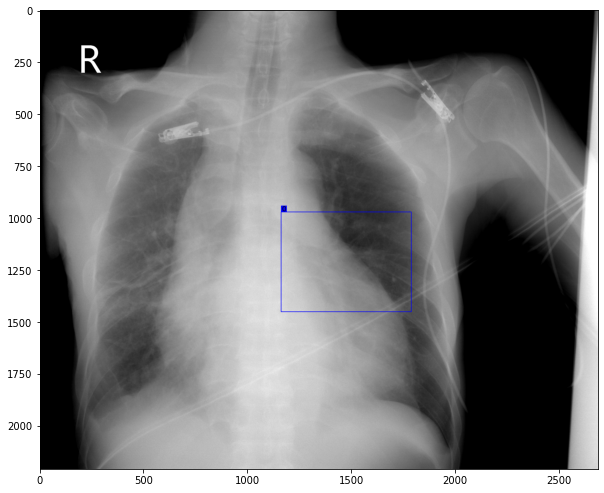

In [ ]:
visualize_plot(tests['image_id'][90])